# Analysis of News Categories

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import gc

In [2]:
#Clear cache
gc.collect()

24

In [3]:
news_category = pd.read_json('D:/MIT_AT/MDA512-DS/Assignment-2/News_Category_Dataset/News_Category_Dataset_v3.json', lines=True)

In [4]:
news_category

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [5]:
news_category.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [6]:
news_category.shape

(209527, 6)

So, 6 columns, and 209527 are rows in this dataset

In [7]:
news_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


<b>A benefit here of the dataset is the date column is alredy in the datetime64 format, otherwise it would have to be converted in to this format.
So, this is the good thing of this dataset.</b>

In [8]:
news_category['category'].value_counts()

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

These are the total categories in this dataset. Also there are <b>counts of differnt categories.</b>

In [9]:
cat_id = news_category['category'].unique()
cat_id

array(['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS',
       'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS',
       'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS',
       'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'QUEER VOICES', 'HOME & LIVING', 'WOMEN', 'BLACK VOICES', 'TRAVEL',
       'MONEY', 'RELIGION', 'LATINO VOICES', 'IMPACT', 'WEDDINGS',
       'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE',
       'HEALTHY LIVING', 'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST',
       'FIFTY', 'ARTS', 'DIVORCE'], dtype=object)

These are names of all <b>unique categories</b> in the dataset.

In [10]:
news_category['category'].nunique()

42

In [11]:
gc.collect()

90

There are total <b>42 unique categories</b> in this dataset.

In [12]:
date = news_category['date'].unique()
date

array(['2022-09-23T00:00:00.000000000', '2022-09-22T00:00:00.000000000',
       '2022-09-21T00:00:00.000000000', ...,
       '2012-01-30T00:00:00.000000000', '2012-01-29T00:00:00.000000000',
       '2012-01-28T00:00:00.000000000'], dtype='datetime64[ns]')

In [13]:
news_category['date'].nunique()

3890

In [14]:
from datetime import datetime
year = news_category[((news_category['date'].dt.year==2012) | (news_category["date"].dt.year==2022))]

In [15]:
year.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [16]:
news_category['category_id'] = news_category.groupby(['category']).ngroup()

In [17]:
news_category.head()

,link,headline,category,short_description,authors,date,category_id
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,35
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,35
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,5
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,22
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,35


In [18]:
news_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
 6   category_id        209527 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 11.2+ MB


In [19]:
news_category['category_id'].unique()

array([35,  5, 22, 40,  7, 32, 28, 10, 24, 37, 11,  9,  6, 27, 38,  3, 30,
       13, 20, 25, 17, 39,  2, 34, 21, 26, 19, 18, 36,  4, 23,  1, 29, 15,
       31, 16, 33, 14, 41, 12,  0,  8], dtype=int64)

In [20]:
news_category['category_id'].nunique()

42

In [21]:
cat = news_category[['category', 'category_id']].drop_duplicates().sort_values('category_id')

In [22]:
cat

,category,category_id
44677,ARTS,0
15389,ARTS & CULTURE,1
455,BLACK VOICES,2
162,BUSINESS,3
14783,COLLEGE,4
2,COMEDY,5
107,CRIME,6
8,CULTURE & ARTS,7
133683,DIVORCE,8
94,EDUCATION,9


In [23]:
import seaborn as sns

In [24]:
data = news_category.groupby('category')['category'].count() 
data

category
ARTS               1509
ARTS & CULTURE     1339
BLACK VOICES       4583
BUSINESS           5992
COLLEGE            1144
COMEDY             5400
CRIME              3562
CULTURE & ARTS     1074
DIVORCE            3426
EDUCATION          1014
ENTERTAINMENT     17362
ENVIRONMENT        1444
FIFTY              1401
FOOD & DRINK       6340
GOOD NEWS          1398
GREEN              2622
HEALTHY LIVING     6694
HOME & LIVING      4320
IMPACT             3484
LATINO VOICES      1130
MEDIA              2944
MONEY              1756
PARENTING          8791
PARENTS            3955
POLITICS          35602
QUEER VOICES       6347
RELIGION           2577
SCIENCE            2206
SPORTS             5077
STYLE              2254
STYLE & BEAUTY     9814
TASTE              2096
TECH               2104
THE WORLDPOST      3664
TRAVEL             9900
U.S. NEWS          1377
WEDDINGS           3653
WEIRD NEWS         2777
WELLNESS          17945
WOMEN              3572
WORLD NEWS         3299
WORLDPO

Exploratory Data Analysis <b>(EDA)</b>

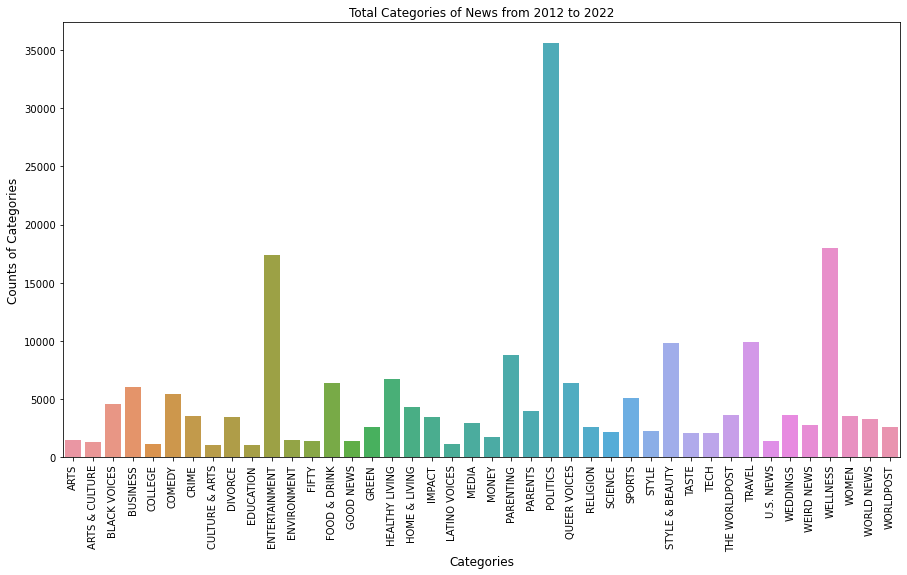

In [25]:
plt.figure(figsize=(15,8))
sns.barplot(y= data.values, x= data.index)
plt.xlabel('Categories', fontsize='large')
plt.ylabel('Counts of Categories', fontsize='large')
plt.title('Total Categories of News from 2012 to 2022', fontsize='large')
plt.xticks(rotation=90)
plt.show()

In [26]:
date = news_category.groupby('date')['date'].count() 
date

date
2012-01-28     66
2012-01-29     65
2012-01-30    100
2012-01-31    100
2012-02-01    100
             ... 
2022-09-19      6
2022-09-20      6
2022-09-21      6
2022-09-22      5
2022-09-23      4
Name: date, Length: 3890, dtype: int64

In [27]:
#pip install wordcloud

In [28]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\utsav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\utsav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\utsav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
Headline = news_category['headline']

In [30]:
Headline.head()

0    Over 4 Million Americans Roll Up Sleeves For O...
1    American Airlines Flyer Charged, Banned For Li...
2    23 Of The Funniest Tweets About Cats And Dogs ...
3    The Funniest Tweets From Parents This Week (Se...
4    Woman Who Called Cops On Black Bird-Watcher Lo...
Name: headline, dtype: object

In [31]:
Category = news_category['category']

In [32]:
Category.head()

0    U.S. NEWS
1    U.S. NEWS
2       COMEDY
3    PARENTING
4    U.S. NEWS
Name: category, dtype: object

In [33]:
news_category['headline']

0         Over 4 Million Americans Roll Up Sleeves For O...
1         American Airlines Flyer Charged, Banned For Li...
2         23 Of The Funniest Tweets About Cats And Dogs ...
3         The Funniest Tweets From Parents This Week (Se...
4         Woman Who Called Cops On Black Bird-Watcher Lo...
                                ...                        
209522    RIM CEO Thorsten Heins' 'Significant' Plans Fo...
209523    Maria Sharapova Stunned By Victoria Azarenka I...
209524    Giants Over Patriots, Jets Over Colts Among  M...
209525    Aldon Smith Arrested: 49ers Linebacker Busted ...
209526    Dwight Howard Rips Teammates After Magic Loss ...
Name: headline, Length: 209527, dtype: object

<b>Removing tags from the dataset.⬇️</b>

In [34]:
def remove_tags(tags):
    remove = re.compile(r'')
    return re.sub(remove, '',tags)
news_category['headline'] = news_category['headline'].apply(remove_tags)
news_category['headline']

0         Over 4 Million Americans Roll Up Sleeves For O...
1         American Airlines Flyer Charged, Banned For Li...
2         23 Of The Funniest Tweets About Cats And Dogs ...
3         The Funniest Tweets From Parents This Week (Se...
4         Woman Who Called Cops On Black Bird-Watcher Lo...
                                ...                        
209522    RIM CEO Thorsten Heins' 'Significant' Plans Fo...
209523    Maria Sharapova Stunned By Victoria Azarenka I...
209524    Giants Over Patriots, Jets Over Colts Among  M...
209525    Aldon Smith Arrested: 49ers Linebacker Busted ...
209526    Dwight Howard Rips Teammates After Magic Loss ...
Name: headline, Length: 209527, dtype: object

<b>Removing special characters from the dataset.⬇️</b>
- It includes the space between two words as well.

In [35]:
def special_char(char):
    reviews = ''
    for x in char:
        if x.isalnum():
            reviews = reviews + x
        else:
            reviews = reviews + ''
    return reviews
news_category['headline'] = news_category['headline'].apply(special_char)
news_category['headline']

0         Over4MillionAmericansRollUpSleevesForOmicronTa...
1         AmericanAirlinesFlyerChargedBannedForLifeAfter...
2         23OfTheFunniestTweetsAboutCatsAndDogsThisWeekS...
3              TheFunniestTweetsFromParentsThisWeekSept1723
4         WomanWhoCalledCopsOnBlackBirdWatcherLosesLawsu...
                                ...                        
209522     RIMCEOThorstenHeinsSignificantPlansForBlackBerry
209523    MariaSharapovaStunnedByVictoriaAzarenkaInAustr...
209524    GiantsOverPatriotsJetsOverColtsAmongMostImprob...
209525        AldonSmithArrested49ersLinebackerBustedForDUI
209526     DwightHowardRipsTeammatesAfterMagicLossToHornets
Name: headline, Length: 209527, dtype: object

<b>Converting all the string into lowercase.⬇️</b>

In [36]:
def convert_lower(low):
    return low.lower()
news_category['headline']=news_category['headline'].apply(convert_lower)
news_category['headline']

0         over4millionamericansrollupsleevesforomicronta...
1         americanairlinesflyerchargedbannedforlifeafter...
2         23ofthefunniesttweetsaboutcatsanddogsthisweeks...
3              thefunniesttweetsfromparentsthisweeksept1723
4         womanwhocalledcopsonblackbirdwatcherloseslawsu...
                                ...                        
209522     rimceothorstenheinssignificantplansforblackberry
209523    mariasharapovastunnedbyvictoriaazarenkainaustr...
209524    giantsoverpatriotsjetsovercoltsamongmostimprob...
209525        aldonsmitharrested49erslinebackerbustedfordui
209526     dwighthowardripsteammatesaftermagiclosstohornets
Name: headline, Length: 209527, dtype: object

In [37]:
news_category['headline'].head()[0]

'over4millionamericansrollupsleevesforomicrontargetedcovidboosters'

<b>Removing all the stop words from the dataset.⬇️</b> 
- It is useful to stop the words from the string. Such as <b>'a, an, the, in', etc.</b>

In [38]:
from nltk.tokenize import word_tokenize

In [39]:
def remove_stopwords(s_w):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(s_w)
    return [x for x in words if x not in stop_words]
news_category['headline'] = news_category['headline'].apply(remove_stopwords)
news_category['headline'].head()

0    [over4millionamericansrollupsleevesforomicront...
1    [americanairlinesflyerchargedbannedforlifeafte...
2    [23ofthefunniesttweetsaboutcatsanddogsthisweek...
3       [thefunniesttweetsfromparentsthisweeksept1723]
4    [womanwhocalledcopsonblackbirdwatcherloseslaws...
Name: headline, dtype: object

In [40]:
news_category['headline'].head()[0]

['over4millionamericansrollupsleevesforomicrontargetedcovidboosters']

<b>Lemmatizing the words from the dataset.⬇️</b>. 
- It is helpful to link the words with the similar meanings to the one word.

In [41]:
#pip install wordnet

it is useful when there is a need to lemmatize the strings.⬆️

In [42]:
#pip install nltk

In [43]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\utsav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [44]:
def lemmatize_word(t):
    wordnet = WordNetLemmatizer()
    return " ".join([wordnet.lemmatize(word) for word in t])
news_category['headline'] = news_category['headline'].apply(lemmatize_word)
news_category['headline'][1]

'americanairlinesflyerchargedbannedforlifeafterpunchingflightattendantonvideo'

In [45]:
news_category.head()

,link,headline,category,short_description,authors,date,category_id
0,https://www.huffpost.com/entry/covid-boosters-...,over4millionamericansrollupsleevesforomicronta...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,35
1,https://www.huffpost.com/entry/american-airlin...,americanairlinesflyerchargedbannedforlifeafter...,U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,35
2,https://www.huffpost.com/entry/funniest-tweets...,23ofthefunniesttweetsaboutcatsanddogsthisweeks...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,5
3,https://www.huffpost.com/entry/funniest-parent...,thefunniesttweetsfromparentsthisweeksept1723,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,22
4,https://www.huffpost.com/entry/amy-cooper-lose...,womanwhocalledcopsonblackbirdwatcherloseslawsu...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,35


In [46]:
x = news_category['headline']
y = news_category['category_id']

In [47]:
x

0         over4millionamericansrollupsleevesforomicronta...
1         americanairlinesflyerchargedbannedforlifeafter...
2         23ofthefunniesttweetsaboutcatsanddogsthisweeks...
3              thefunniesttweetsfromparentsthisweeksept1723
4         womanwhocalledcopsonblackbirdwatcherloseslawsu...
                                ...                        
209522     rimceothorstenheinssignificantplansforblackberry
209523    mariasharapovastunnedbyvictoriaazarenkainaustr...
209524    giantsoverpatriotsjetsovercoltsamongmostimprob...
209525        aldonsmitharrested49erslinebackerbustedfordui
209526     dwighthowardripsteammatesaftermagiclosstohornets
Name: headline, Length: 209527, dtype: object

In [48]:
news_category['headline']

0         over4millionamericansrollupsleevesforomicronta...
1         americanairlinesflyerchargedbannedforlifeafter...
2         23ofthefunniesttweetsaboutcatsanddogsthisweeks...
3              thefunniesttweetsfromparentsthisweeksept1723
4         womanwhocalledcopsonblackbirdwatcherloseslawsu...
                                ...                        
209522     rimceothorstenheinssignificantplansforblackberry
209523    mariasharapovastunnedbyvictoriaazarenkainaustr...
209524    giantsoverpatriotsjetsovercoltsamongmostimprob...
209525        aldonsmitharrested49erslinebackerbustedfordui
209526     dwighthowardripsteammatesaftermagiclosstohornets
Name: headline, Length: 209527, dtype: object

In [49]:
x.shape

(209527,)

In [50]:
gc.collect()

97

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
x = np.array(news_category.iloc[:,0].values)
y = np.array(news_category.category_id.values)
cv = CountVectorizer(max_features = 100)
x = cv.fit_transform(news_category.headline).toarray()


In [53]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

146668
62859


In [56]:
y_train

array([16, 38, 27, ..., 28, 10, 21], dtype=int64)

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [58]:
list = [ ]

In [59]:
def model(mdl_name, est_c, est_pnlty):
    mdl=''
    if mdl_name == 'Logistic Regression':
        mdl = LogisticRegression()
    elif mdl_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
    elif mdl_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB(alpha=1.0, fit_prior=True)
    elif mdl_name == 'Support Vector Classifier':
        mdl = SVC()
    elif mdl_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()
    elif mdl_name == 'K Nearest Neighbour':
        mdl = KNeighborsClassifier(n_neighbors=10, metric = 'minkowski', p =4)
    elif mdl_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()
    oneVsRest = OneVsRestClassifier(mdl)
    oneVsRest.fit(x_train, y_train)
    y_pred = oneVsRest.predict(x_test)
    
    #Performance Metrics
    accuracy = round(accuracy_score(y_test, y_pred)*100, 2)
    
    #Get Precision, recall, and F1 Scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')
    print(f'Test Accuracy Score of Basic {mdl_name}: % {accuracy}')
    print(f'Precison : {precision}')
    print(f'Recall : {recall}')
    print(f'F1-score : {f1score}')
    
    #Add Performance Parameters to the List
    list.append(dict([('Model', mdl_name),
                     ('Test Accuracy', round(accuracy, 2)),
                     ('Precison', round(precision, 2)),
                     ('Recall', round(recall, 2)),
                     ('F1', round(f1score, 2))
                     ]))

In [60]:
model('Logistic Regression', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Logistic Regression: % 17.38
Precison : 0.17375395726944431
Recall : 0.17375395726944431
F1-score : 0.17375395726944431


In [61]:
gc.collect()

775

In [71]:
model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Multinomial Naive Bayes: % 17.39
Precison : 0.17391304347826086
Recall : 0.17391304347826086
F1-score : 0.17391304347826086


In [72]:
gc.collect()

84

In [73]:
from sklearn.base import clone

In [74]:
gc.collect()

30

In [75]:
model('Decision Tree Classifier', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Decision Tree Classifier: % 17.42
Precison : 0.17419939865413067
Recall : 0.17419939865413067
F1-score : 0.17419939865413067


In [76]:
gc.collect()

54

In [77]:
gc.collect()

15

In [78]:
model('Random Forest', est_c=None, est_pnlty=None) 

Test Accuracy Score of Basic Random Forest: % 17.42
Precison : 0.17421530727501233
Recall : 0.17421530727501233
F1-score : 0.17421530727501233


In [79]:
model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Gaussian Naive Bayes: % 1.65
Precison : 0.016544965716922
Recall : 0.016544965716922
F1-score : 0.016544965716922


In [81]:
performance = pd.DataFrame(data=list)
performance = performance[['Model','Test Accuracy','Precision','Recall','F1']]

In [82]:
performance

,Model,Test Accuracy,Precison,Recall,F1
0,Logistic Regression,17.38,0.17,0.17,0.17
1,Multinomial Naive Bayes,17.39,0.17,0.17,0.17
2,Decision Tree Classifier,17.42,0.17,0.17,0.17
3,Random Forest,17.42,0.17,0.17,0.17
4,Gaussian Naive Bayes,1.65,0.02,0.02,0.02


In [85]:
model = performance['Model']
max_value = performance['Test Accuracy'].max()
print("Best accuracy score of model is", max_value,'from Random Forest')

Best accuracy score of model is 17.42 from Random Forest


In [93]:
classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0).fit(x_train, y_train)
classifier
y_pred = classifier.predict(x_test)

In [104]:
Y_pred1 = cv.transform(["Education minister open to changes on how indexation applies to HECS-HELP debt"])
hl = classifier.predict(Y_pred1)
result = ''
if hl == [0]:
    result = 'ARTS'
elif hl == [1]:
    result = 'ARTS & CULTURE'
elif hl == [2]:
    result = 'BLACK VOICES'
elif hl == [3]:
    result = 'BUSINESS'
elif hl == [4]:
    result = 'COLLEGE'
elif hl == [5]:
    result = 'COMEDY'
elif hl == [6]:
    result = 'CRIME'
elif hl == [7]:
    result = 'CULTURE & ARTS'
elif hl == [8]:
    result = 'DIVORCE'
elif hl == [9]:
    result = 'EDUCATION'
elif hl == [10]:
    result = 'ENTERTAINMENT'
elif hl == [11]:
    result = 'ENVIRONMENT'
elif hl == [12]:
    result = 'FIFTY'
elif hl == [13]:
    result = 'FOOD & DRINK'
elif hl == [14]:
    result = 'GOOD NEWS'
elif hl == [15]:
    result = 'GREEN'
elif hl == [16]:
    result = 'HEALTHY LIVING'
elif hl == [17]:
    result = 'HOME & LIVING'
elif hl == [18]:
    result = 'IMPACT'
elif hl == [19]:
    result = 'LATINO VOICES'
elif hl == [20]:
    result = 'MEDIA'
elif hl == [21]:
    result = 'MONEY'
elif hl == [22]:
    result = 'PARENTING'
elif hl == [23]:
    result = 'PARENTS'
elif hl == [24]:
    result = 'POLITICS'
elif hl == [25]:
    result = 'QUEER VOICES'
elif hl == [26]:
    result = 'RELIGION'
elif hl == [27]:
    result = 'SCIENCE'
elif hl == [28]:
    result = 'SPORTS'
elif hl == [29]:
    result = 'STYLE'
elif hl == [30]:
    result = 'STYLE & BEAUTY'
elif hl == [31]:
    result = 'TASTE'
elif hl == [32]:
    result = 'TECH'
elif hl == [33]:
    result = 'THE WORLDPOST'
elif hl == [34]:
    result = 'TRAVEL'
elif hl == [35]:
    result = 'U.S. NEWS'
elif hl == [36]:
    result = 'WEDDINGS'
elif hl == [37]:
    result = 'WEIRD NEWS'
elif hl == [38]:
    result = 'WELLNESS'
elif hl == [39]:
    result = 'WOMEN'
elif hl == [40]:
    result = 'WORLD NEWS'
elif hl == [41]:
    result = 'WORLDPOST'
print('The Category of the given headline is:', result)

The Category of the given headline is: POLITICS
